In [67]:
%run ./PPS_Expansion_Model.ipynb

/home/renato-paredes/.virtualenvs/gifted/lib/python3.13/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [68]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

## HC Training

In [74]:
HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)  # feedforward and feedback

rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

k_a = 5e-05
k_v = 5e-05
theta = 0.05
stim_counts = 10

HCWa_tr, HCWv_tr, zm, zv, za, zt = FWTraining(
    stim_counts,
    simtime,
    ts,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

Text(0.5, 1.0, 'HC')

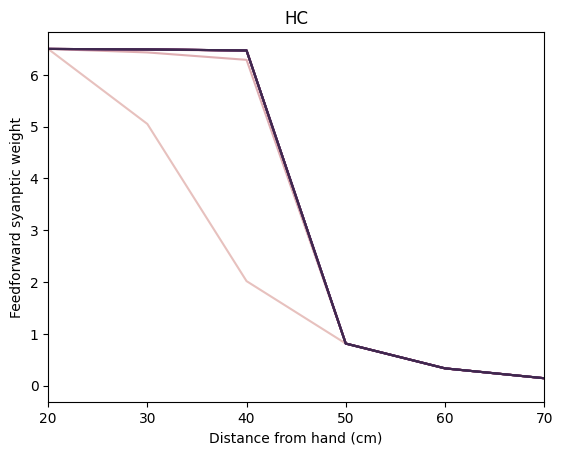

In [75]:
import seaborn as sns

hc_training_steps = np.column_stack((HCWa_tr[:, 1, :, 0], HCWa_tr[:, 1, -1, -1]))

sns.lineplot(
    hc_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("HC")

## SCZ Training

In [5]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

stim_counts = 10
k_a = 5e-05
k_v = 5e-05
theta = 0.05

Lex, Pr = 1.963e00, 1.044e-01

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{sm}}$')

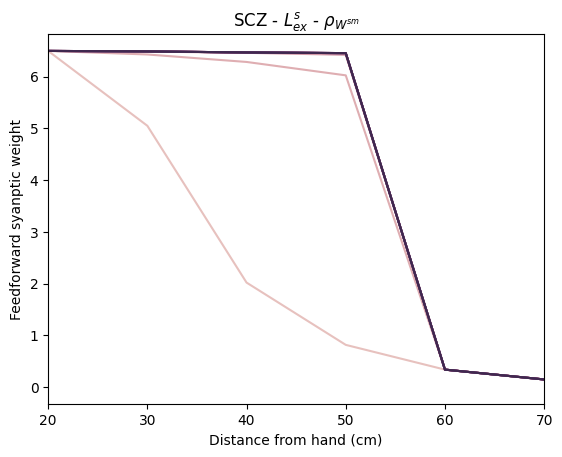

In [6]:
scz_training_steps = np.column_stack((SCZWa_tr[:, 1, :, 0], SCZWa_tr[:, 1, -1, -1]))

sns.lineplot(
    scz_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{sm}}$")

## SCZ Training - Increased learning rate

In [7]:
stim_counts = 10
k_a = 5e-05
k_v = 5e-05
rho_0 = 6.159e-05
sigav_x, locav_x = 5.394e00, 3.271e01

SCZWa_tr_rho, SCZWv_tr_rho, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    0.05,
    sigav_x,
    locav_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{sm}}$ - $\\rho^{s}_{0}$')

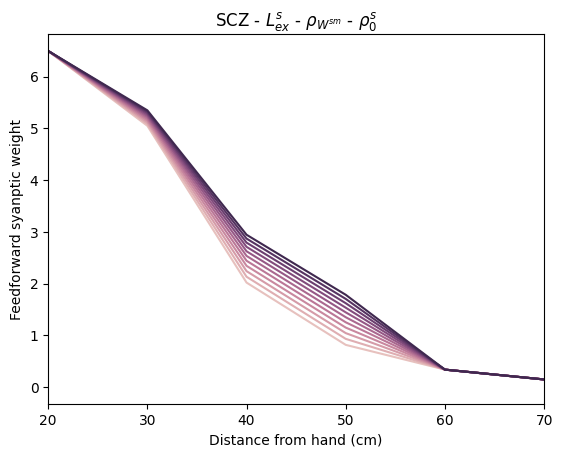

In [8]:
scz_training_steps_rho = np.column_stack(
    (SCZWa_tr_rho[:, 1, :, 0], SCZWa_tr_rho[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_rho, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\rho^{s}_{0}$")

## SCZ Training - Forgetting rate

In [9]:
stim_counts = 10
k_a = 3.364e-02
k_v = 3.364e-02
rho_0 = 7.533e-03
sigav_x, locav_x = 5.394e00, 3.271e01

SCZWa_tr_kappa, SCZWv_tr_kappa, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    0.05,
    sigav_x,
    locav_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{sm}}$ - $\\kappa^{s}$')

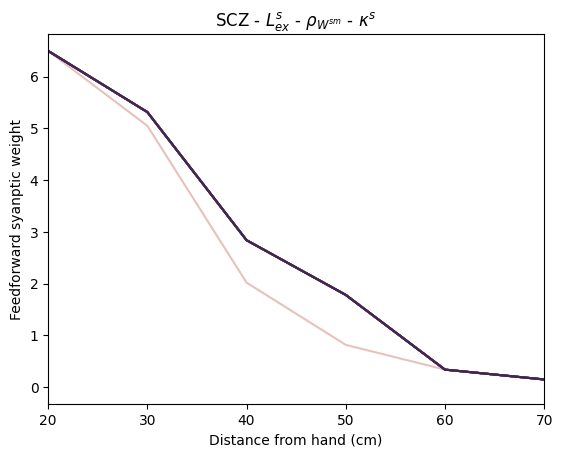

In [10]:
scz_training_steps_kappa = np.column_stack(
    (SCZWa_tr_kappa[:, 1, :, 0], SCZWa_tr_kappa[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_kappa,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\kappa^{s}$")

## SCZ Training - Plasticity threshold

In [11]:
theta_tr = 9.937e-01
stim_counts = 10
k_a = 5e-05
k_v = 5e-05
Lex, Pr = 1.963e00, 1.044e-01
rho_0 = 7.533e-03
sigav_x, locav_x = 5.394e00, 3.271e01

SCZWa_tr_theta, SCZWv_tr_theta, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta_tr,
    sigav_x,
    locav_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{sm}}$ - $\\theta$')

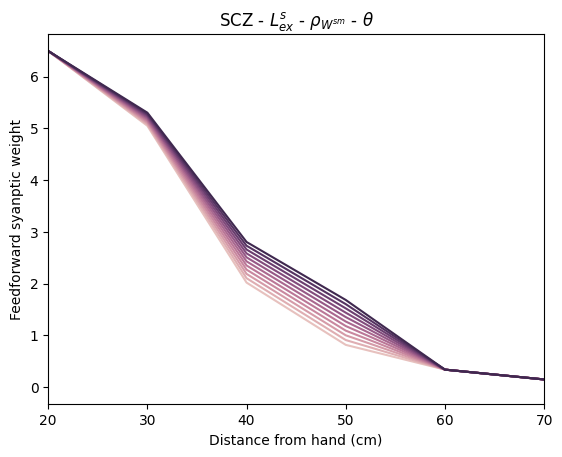

In [12]:
scz_training_steps_theta = np.column_stack(
    (SCZWa_tr_theta[:, 1, :, 0], SCZWa_tr_theta[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_theta,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\theta$")

## Figure 5

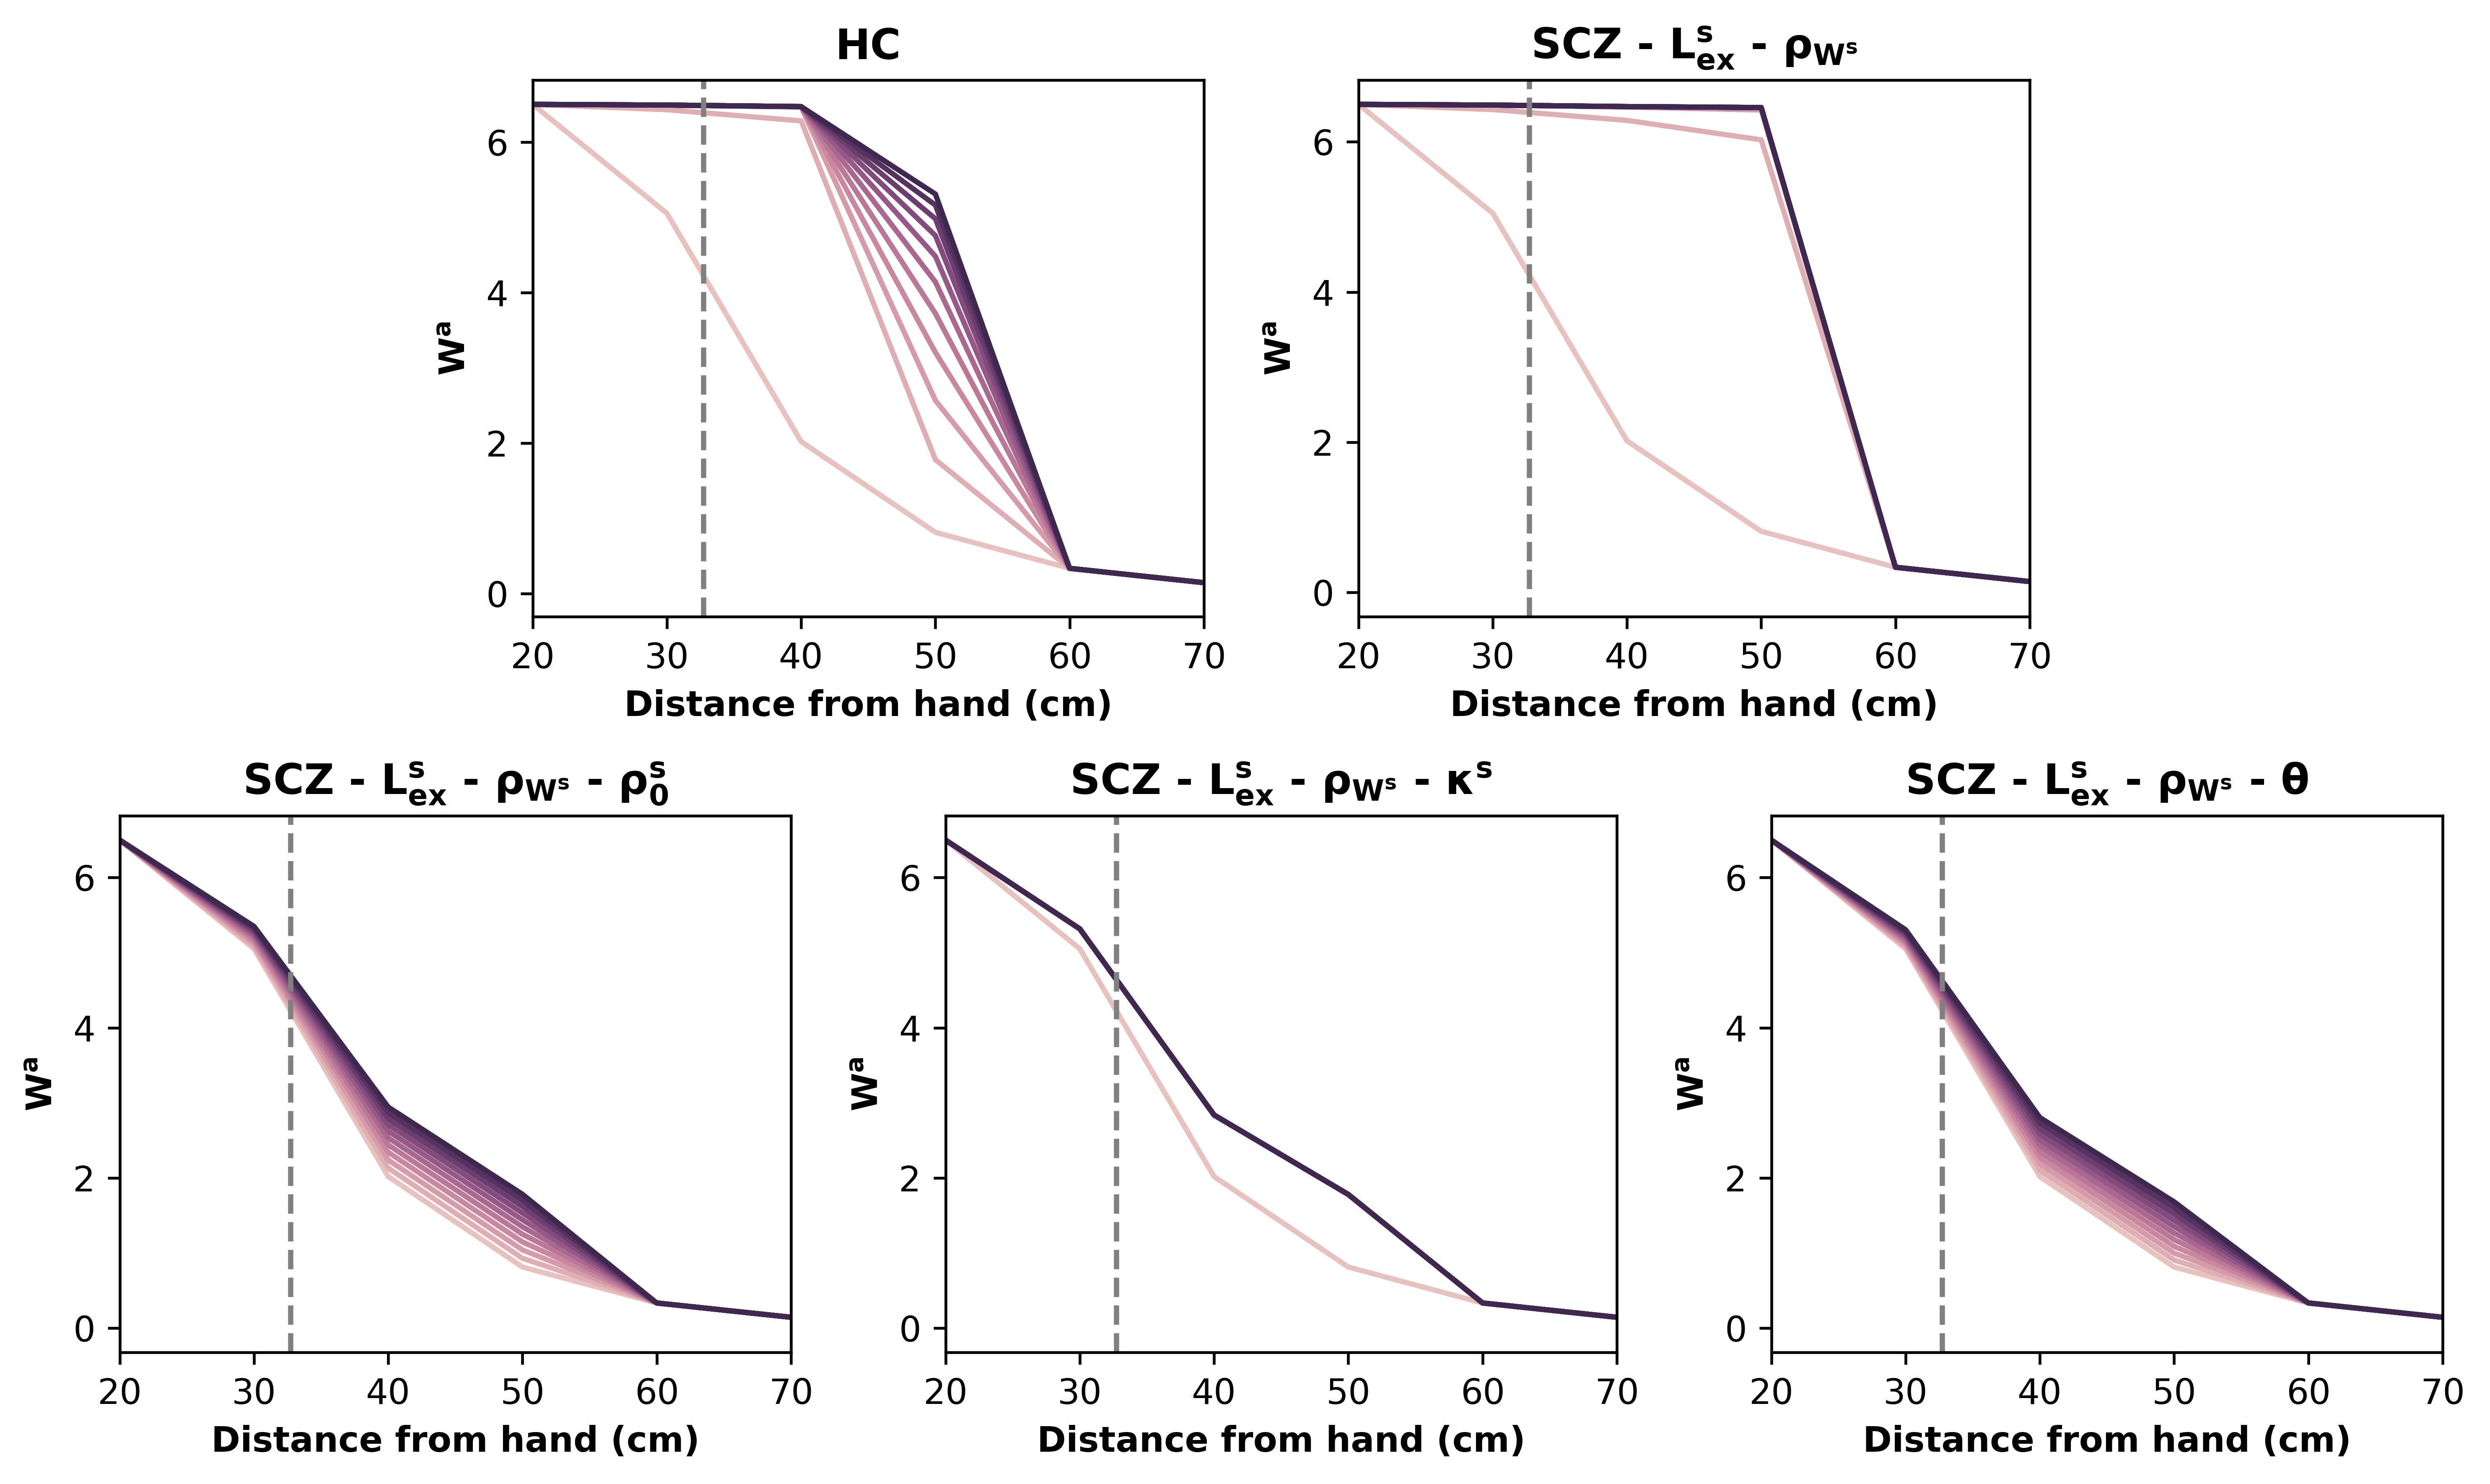

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(10, 6), dpi=600)

# 1. Create the 2-row, 6-column GridSpec
gs = fig.add_gridspec(2, 6)

# 2. Add subplots for the top row (centered)
# We use columns 1-2 and 3-4, leaving 0 and 5 empty
ax1 = fig.add_subplot(gs[0, 1:3])
sns.lineplot(
    hc_training_steps,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax1,
)
ax1.set_title("HC", fontweight="bold")

ax2 = fig.add_subplot(gs[0, 3:5])
sns.lineplot(
    scz_training_steps,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax2,
)
ax2.set_title(
    "SCZ - " + r"$\mathbf{L^{s}_{ex}}$ - " + r"$\mathbf{\rho_{{W}^{s}}}$",
    fontweight="bold",
)

# 3. Add subplots for the bottom row
# These fill all 6 columns
ax3 = fig.add_subplot(gs[1, 0:2])
sns.lineplot(
    scz_training_steps_rho,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax3,
)
ax3.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\rho^{s}_{0}}$",
    fontweight="bold",
)

ax4 = fig.add_subplot(gs[1, 2:4])
sns.lineplot(
    scz_training_steps_kappa,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax4,
)
ax4.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\kappa^{s}}$",
    fontweight="bold",
)

ax5 = fig.add_subplot(gs[1, 4:6])
sns.lineplot(
    scz_training_steps_theta,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax5,
)
ax5.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\theta}$",
    fontweight="bold",
)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(2, 7)
    ax.set_xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
    ax.set_xlabel("Distance from hand (cm)", fontweight="bold")
    ax.set_ylabel(r"$\mathbf{W^{a}}$", fontweight="bold")
    ax.axvline(x=3.271, color="gray", linestyle="--")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

fig.savefig("drafts/FIG5.eps", bbox_inches="tight", format="eps")